In [1]:
import pandas as pd
import geopandas as gpd

# Load shape data

In [2]:
sgmc_geology = gpd.read_file('../USGS_SGMC_Shapefiles/SGMC_Geology.dbf')

In [3]:
sgmc_geology.keys()

Index(['STATE', 'ORIG_LABEL', 'SGMC_LABEL', 'UNIT_LINK', 'UNIT_NAME',
       'AGE_MIN', 'AGE_MAX', 'MAJOR1', 'MAJOR2', 'MAJOR3', 'MINOR1', 'MINOR2',
       'MINOR3', 'MINOR4', 'MINOR5', 'INCIDENTAL', 'INDETERMIN', 'REF_ID',
       'REFERENCE', 'GENERALIZE', 'DIGITAL_UR', 'NGMDB1', 'NGMDB2', 'NGMDB3',
       'Shape_Leng', 'Shape_Area', 'RuleID', 'geometry'],
      dtype='object')

## select columns

In [65]:
attribute_list = ['STATE', 'ORIG_LABEL', 'SGMC_LABEL', 'UNIT_LINK', 'UNIT_NAME', 'AGE_MIN', 'AGE_MAX', 'MAJOR1', 'MAJOR2', 'MAJOR3', 'MINOR1', 'MINOR2', 'MINOR3', 'MINOR4', 'MINOR5', 'GENERALIZE', 'geometry']

In [48]:
sgmc_subset = sgmc_geology[attribute_list]

In [39]:
# ind_invalid = ~sgmc_subset['geometry'].is_valid
# sgmc_subset.loc[ind_invalid, 'geometry'] = sgmc_subset.loc[ind_invalid, 'geometry'].buffer(0)

## aggregate (dissolve) polygons by key columns

In [50]:
key_cols = ['STATE', 'ORIG_LABEL', 'SGMC_LABEL', 'UNIT_LINK', 'UNIT_NAME']
sgmc_dissolved = sgmc_subset.dissolve(by=key_cols, aggfunc='first')

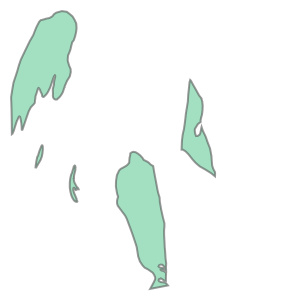

In [54]:
sgmc_dissolved.iloc[6000]['geometry']


## associate dissolved rows with Units Table

In [63]:
sgmc_units = pd.read_csv('../USGS_SGMC_Tables_CSV/SGMC_Units.csv')
attributes = key_cols + ['UNIT_AGE','UNITDESC']
sgmc_units_subset = sgmc_units[attributes]
# sgmc_units_subset.groupby(key_cols).size()
sgmc_units_subset

,STATE,ORIG_LABEL,SGMC_LABEL,UNIT_LINK,UNIT_NAME,UNIT_AGE,UNITDESC
0,AL,at,at,ALat;7,Almond Trondhjemite,Precambrian to Paleozoic,"Leucocratic, fine to medium-grained, locally f..."
1,AL,ba,ba,ALba;7,Beaverdam Amphibolite,Precambrian to Paleozoic,Dark-green to dark-gray hornblende amphibolite...
2,AL,bm,bm,ALbm;9,Mylonitic and Cataclastic Rocks in the Brevard...,Precambrian to Paleozoic,"Blastomylonite, mylonite gneiss, locally inclu..."
3,AL,bsg,bsg,ALbsg;7,Bluff Springs Granite,Precambrian to Paleozoic,Leucocratic quartz diorite (tonalite) to quart...
4,AL,Cb,CAb,ALCAb;6,Bibb Dolomite,Cambrian,Dark-gray thick-bedded siliceous dolomite; cha...
...,...,...,...,...,...,...,...
6622,WY,Xqd,Xqd,WYXqd;0,Quartz diorite,Early Proterozoic,Sierra Madre--Encampment River Granodiorite 4;...
6623,WY,Xsv,Xsv,WYXsv;0,Metasedimentary and metavolcanic rocks,Early Proterozoic,"Sierra Madre--Granite gneiss, felsic gneiss, a..."
6624,WY,Yla,Yla,WYYla;0,Laramide Anorthosite Complex--anorthosite and ...,Middle Proterozoic,Anorthosite and norite. In Laramie Mountains.
6625,WY,Yls,Yls,WYYls;0,Laramide Anorthosite Complex--pyroxene and hor...,Middle Proterozoic,"Pyroxene and hornblende syenite--Age 1,435 Ma...."


In [64]:
merged_df = pd.merge(sgmc_dissolved, sgmc_units_subset, how="left", on=key_cols)
merged_df

,STATE,ORIG_LABEL,SGMC_LABEL,UNIT_LINK,UNIT_NAME,geometry,AGE_MIN,AGE_MAX,MAJOR1,MAJOR2,MAJOR3,MINOR1,MINOR2,MINOR3,MINOR4,MINOR5,GENERALIZE,Shape_Area,UNIT_AGE,UNITDESC
0,AL,Cb,CAb;6,ALCAb;6,Bibb Dolomite,"MULTIPOLYGON (((832781.765 1141916.902, 832757...",Phanerozoic - Paleozoic - Cambrian,Phanerozoic - Paleozoic - Cambrian,Dolostone,None,None,Chert,None,None,None,None,"Sedimentary, carbonate",1.395523e+05,NaN,NaN
1,AL,Cbf,CAbf;6,ALCAbf;6,Brierfield Dolomite,"MULTIPOLYGON (((828105.461 1140035.734, 828194...",Phanerozoic - Paleozoic - Cambrian,Phanerozoic - Paleozoic - Cambrian,Dolostone,None,None,Chert,None,None,None,None,"Sedimentary, carbonate",2.425160e+07,NaN,NaN
2,AL,Cc,CAc;3,ALCAc;3,Conasauga Formation,"MULTIPOLYGON (((834307.853 1195534.911, 834340...",Phanerozoic - Paleozoic - Cambrian,Phanerozoic - Paleozoic - Cambrian,Limestone,Shale,None,None,None,None,None,None,"Sedimentary, undifferentiated",1.762098e+07,NaN,NaN
3,AL,Cc,CAc;5,ALCAc;5,Conasauga Formation,"MULTIPOLYGON (((815080.156 1159156.222, 815251...",Phanerozoic - Paleozoic - Cambrian,Phanerozoic - Paleozoic - Cambrian,Limestone,Shale,None,None,None,None,None,None,"Sedimentary, undifferentiated",1.732465e+06,NaN,NaN
4,AL,Cc,CAc;6,ALCAc;6,Conasauga Formation,"MULTIPOLYGON (((823372.143 1137719.412, 824201...",Phanerozoic - Paleozoic - Cambrian,Phanerozoic - Paleozoic - Cambrian,Dolostone,Limestone,None,Shale,Chert,None,None,None,"Sedimentary, carbonate",9.869306e+05,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6966,WY,Yla,Yla;0,WYYla;0,Laramide Anorthosite Complex--anorthosite and ...,"MULTIPOLYGON (((-768571.933 2079560.032, -7687...",preCambrian-Proterozoic - Mesoproterozoic,preCambrian-Proterozoic - Mesoproterozoic,Anorthosite,Norite,None,None,None,None,None,None,"Igneous, intrusive",3.115904e+05,NaN,NaN
6967,WY,Yls,Yls;0,WYYls;0,Laramide Anorthosite Complex--pyroxene and hor...,"MULTIPOLYGON (((-773800.293 2087111.476, -7738...",preCambrian-Proterozoic - Mesoproterozoic,preCambrian-Proterozoic - Mesoproterozoic,Syenite,None,None,None,None,None,None,None,"Igneous, intrusive",4.861091e+05,NaN,NaN
6968,WY,Ys,Ys;0,WYYs;0,Sherman Granite,"MULTIPOLYGON (((-779504.745 2037872.843, -7793...",preCambrian-Proterozoic - Mesoproterozoic - Ca...,preCambrian-Proterozoic - Mesoproterozoic - Ca...,Granite,None,None,None,None,None,None,None,"Igneous, intrusive",2.696022e+05,NaN,NaN
6969,WY,_r,CAr;0,WYCAr;0,"Gallatin Limestone, Gros Ventre Formation and ...","MULTIPOLYGON (((-1048519.510 2469315.250, -104...",Phanerozoic - Paleozoic - Cambrian - Furongian,Phanerozoic - Paleozoic - Cambrian - Middle-Ca...,Limestone,Sandstone,Shale,None,None,None,None,None,"Sedimentary, undifferentiated",3.124772e+08,NaN,NaN


In [66]:
merged_df = merged_df.drop(columns=['Shape_Area'])
merged_df


,STATE,ORIG_LABEL,SGMC_LABEL,UNIT_LINK,UNIT_NAME,geometry,AGE_MIN,AGE_MAX,MAJOR1,MAJOR2,MAJOR3,MINOR1,MINOR2,MINOR3,MINOR4,MINOR5,GENERALIZE,UNIT_AGE,UNITDESC
0,AL,Cb,CAb;6,ALCAb;6,Bibb Dolomite,"MULTIPOLYGON (((832781.765 1141916.902, 832757...",Phanerozoic - Paleozoic - Cambrian,Phanerozoic - Paleozoic - Cambrian,Dolostone,None,None,Chert,None,None,None,None,"Sedimentary, carbonate",NaN,NaN
1,AL,Cbf,CAbf;6,ALCAbf;6,Brierfield Dolomite,"MULTIPOLYGON (((828105.461 1140035.734, 828194...",Phanerozoic - Paleozoic - Cambrian,Phanerozoic - Paleozoic - Cambrian,Dolostone,None,None,Chert,None,None,None,None,"Sedimentary, carbonate",NaN,NaN
2,AL,Cc,CAc;3,ALCAc;3,Conasauga Formation,"MULTIPOLYGON (((834307.853 1195534.911, 834340...",Phanerozoic - Paleozoic - Cambrian,Phanerozoic - Paleozoic - Cambrian,Limestone,Shale,None,None,None,None,None,None,"Sedimentary, undifferentiated",NaN,NaN
3,AL,Cc,CAc;5,ALCAc;5,Conasauga Formation,"MULTIPOLYGON (((815080.156 1159156.222, 815251...",Phanerozoic - Paleozoic - Cambrian,Phanerozoic - Paleozoic - Cambrian,Limestone,Shale,None,None,None,None,None,None,"Sedimentary, undifferentiated",NaN,NaN
4,AL,Cc,CAc;6,ALCAc;6,Conasauga Formation,"MULTIPOLYGON (((823372.143 1137719.412, 824201...",Phanerozoic - Paleozoic - Cambrian,Phanerozoic - Paleozoic - Cambrian,Dolostone,Limestone,None,Shale,Chert,None,None,None,"Sedimentary, carbonate",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6966,WY,Yla,Yla;0,WYYla;0,Laramide Anorthosite Complex--anorthosite and ...,"MULTIPOLYGON (((-768571.933 2079560.032, -7687...",preCambrian-Proterozoic - Mesoproterozoic,preCambrian-Proterozoic - Mesoproterozoic,Anorthosite,Norite,None,None,None,None,None,None,"Igneous, intrusive",NaN,NaN
6967,WY,Yls,Yls;0,WYYls;0,Laramide Anorthosite Complex--pyroxene and hor...,"MULTIPOLYGON (((-773800.293 2087111.476, -7738...",preCambrian-Proterozoic - Mesoproterozoic,preCambrian-Proterozoic - Mesoproterozoic,Syenite,None,None,None,None,None,None,None,"Igneous, intrusive",NaN,NaN
6968,WY,Ys,Ys;0,WYYs;0,Sherman Granite,"MULTIPOLYGON (((-779504.745 2037872.843, -7793...",preCambrian-Proterozoic - Mesoproterozoic - Ca...,preCambrian-Proterozoic - Mesoproterozoic - Ca...,Granite,None,None,None,None,None,None,None,"Igneous, intrusive",NaN,NaN
6969,WY,_r,CAr;0,WYCAr;0,"Gallatin Limestone, Gros Ventre Formation and ...","MULTIPOLYGON (((-1048519.510 2469315.250, -104...",Phanerozoic - Paleozoic - Cambrian - Furongian,Phanerozoic - Paleozoic - Cambrian - Middle-Ca...,Limestone,Sandstone,Shale,None,None,None,None,None,"Sedimentary, undifferentiated",NaN,NaN


## save merged table to parquet file

In [67]:
merged_df.to_parquet('merged_table.parquet')

## Text processing

In [68]:
import geopandas as gpd

data = gpd.read_parquet('merged_table.parquet')
data

,STATE,ORIG_LABEL,SGMC_LABEL,UNIT_LINK,UNIT_NAME,geometry,AGE_MIN,AGE_MAX,MAJOR1,MAJOR2,MAJOR3,MINOR1,MINOR2,MINOR3,MINOR4,MINOR5,GENERALIZE,UNIT_AGE,UNITDESC
0,AL,Cb,CAb;6,ALCAb;6,Bibb Dolomite,"MULTIPOLYGON (((832781.765 1141916.902, 832757...",Phanerozoic - Paleozoic - Cambrian,Phanerozoic - Paleozoic - Cambrian,Dolostone,None,None,Chert,None,None,None,None,"Sedimentary, carbonate",None,None
1,AL,Cbf,CAbf;6,ALCAbf;6,Brierfield Dolomite,"MULTIPOLYGON (((828105.461 1140035.734, 828194...",Phanerozoic - Paleozoic - Cambrian,Phanerozoic - Paleozoic - Cambrian,Dolostone,None,None,Chert,None,None,None,None,"Sedimentary, carbonate",None,None
2,AL,Cc,CAc;3,ALCAc;3,Conasauga Formation,"MULTIPOLYGON (((834307.853 1195534.911, 834340...",Phanerozoic - Paleozoic - Cambrian,Phanerozoic - Paleozoic - Cambrian,Limestone,Shale,None,None,None,None,None,None,"Sedimentary, undifferentiated",None,None
3,AL,Cc,CAc;5,ALCAc;5,Conasauga Formation,"MULTIPOLYGON (((815080.156 1159156.222, 815251...",Phanerozoic - Paleozoic - Cambrian,Phanerozoic - Paleozoic - Cambrian,Limestone,Shale,None,None,None,None,None,None,"Sedimentary, undifferentiated",None,None
4,AL,Cc,CAc;6,ALCAc;6,Conasauga Formation,"MULTIPOLYGON (((823372.143 1137719.412, 824201...",Phanerozoic - Paleozoic - Cambrian,Phanerozoic - Paleozoic - Cambrian,Dolostone,Limestone,None,Shale,Chert,None,None,None,"Sedimentary, carbonate",None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6966,WY,Yla,Yla;0,WYYla;0,Laramide Anorthosite Complex--anorthosite and ...,"MULTIPOLYGON (((-768571.933 2079560.032, -7687...",preCambrian-Proterozoic - Mesoproterozoic,preCambrian-Proterozoic - Mesoproterozoic,Anorthosite,Norite,None,None,None,None,None,None,"Igneous, intrusive",None,None
6967,WY,Yls,Yls;0,WYYls;0,Laramide Anorthosite Complex--pyroxene and hor...,"MULTIPOLYGON (((-773800.293 2087111.476, -7738...",preCambrian-Proterozoic - Mesoproterozoic,preCambrian-Proterozoic - Mesoproterozoic,Syenite,None,None,None,None,None,None,None,"Igneous, intrusive",None,None
6968,WY,Ys,Ys;0,WYYs;0,Sherman Granite,"MULTIPOLYGON (((-779504.745 2037872.843, -7793...",preCambrian-Proterozoic - Mesoproterozoic - Ca...,preCambrian-Proterozoic - Mesoproterozoic - Ca...,Granite,None,None,None,None,None,None,None,"Igneous, intrusive",None,None
6969,WY,_r,CAr;0,WYCAr;0,"Gallatin Limestone, Gros Ventre Formation and ...","MULTIPOLYGON (((-1048519.510 2469315.250, -104...",Phanerozoic - Paleozoic - Cambrian - Furongian,Phanerozoic - Paleozoic - Cambrian - Middle-Ca...,Limestone,Sandstone,Shale,None,None,None,None,None,"Sedimentary, undifferentiated",None,None


In [69]:
data.groupby(key_cols).size()

STATE  ORIG_LABEL  SGMC_LABEL  UNIT_LINK  UNIT_NAME                                                                                        
AL     Cb          CAb;6       ALCAb;6    Bibb Dolomite                                                                                        1
       Cbf         CAbf;6      ALCAbf;6   Brierfield Dolomite                                                                                  1
       Cc          CAc;3       ALCAc;3    Conasauga Formation                                                                                  1
                   CAc;5       ALCAc;5    Conasauga Formation                                                                                  1
                   CAc;6       ALCAc;6    Conasauga Formation                                                                                  1
                                                                                                                                       

In [70]:
attribute_desc = ['UNIT_NAME', 'AGE_MIN', 'AGE_MAX', 'MAJOR1', 'MAJOR2', 'MAJOR3', 'MINOR1', 'MINOR2', 'MINOR3', 'MINOR4', 'MINOR5', 'GENERALIZE', 'UNITDESC']
data['full_desc'] = data[attribute_desc].stack().groupby(level=0).agg(' '.join)

In [71]:
import sys
sys.path.insert(0, '/data/meng/datalake/cmaas-ta2/k8s/meng/mappable_criteria/geoscience_language_models/project_tools')


In [72]:

import nrcan_p2.data_processing.preprocessing_dfcol as preprocessing_dfcol
import nrcan_p2.data_processing.preprocessing_str as preprocessing_str
import nrcan_p2.data_processing.preprocessing_df_filter as preprocessing_df_filter

In [79]:
def dfcol_sep_hyphen(dfcol):
    return dfcol.str.replace('-', ' - ')

In [80]:
pipeline = [
    dfcol_sep_hyphen,
    preprocessing_dfcol.rm_dbl_space,
    preprocessing_dfcol.rm_cid,
    preprocessing_dfcol.convert_to_ascii,
    preprocessing_dfcol.rm_nonprintable,
    preprocessing_df_filter.filter_no_letter,
    preprocessing_dfcol.rm_newline_hyphenation,
    preprocessing_dfcol.rm_newline,    
    preprocessing_df_filter.filter_no_real_words_g3letter, 
    # preprocessing_df_filter.filter_with_email,
    # preprocessing_dfcol.rm_url,
    # preprocessing_dfcol.rm_doi,
    # preprocessing_df_filter.filter_with_phonenumber,
    # preprocessing_df_filter.filter_non_english,
    preprocessing_df_filter.filter_l80_real_words,
    preprocessing_dfcol.tokenize_spacy_lg,
    preprocessing_dfcol.rm_stopwords_spacy,
]

In [78]:
temp_col = data['full_desc']
temp_col.apply(lambda x: x.replace('-', ' - '))

0       Bibb Dolomite Phanerozoic  -  Paleozoic  -  Ca...
1       Brierfield Dolomite Phanerozoic  -  Paleozoic ...
2       Conasauga Formation Phanerozoic  -  Paleozoic ...
3       Conasauga Formation Phanerozoic  -  Paleozoic ...
4       Conasauga Formation Phanerozoic  -  Paleozoic ...
                              ...                        
6966    Laramide Anorthosite Complex -  - anorthosite ...
6967    Laramide Anorthosite Complex -  - pyroxene and...
6968    Sherman Granite preCambrian - Proterozoic  -  ...
6969    Gallatin Limestone, Gros Ventre Formation and ...
6970    Shear zone preCambrian - Archean preCambrian -...
Name: full_desc, Length: 6971, dtype: object

In [81]:
data_ = data.copy()

In [82]:
col = 'full_desc'
for i, pipe_step in enumerate(pipeline):
    if pipe_step.__module__.split('.')[-1] == 'preprocessing_df_filter':
        data_ = pipe_step(data_, col)
    else:
        data_[col] = pipe_step(data_[col])
    print(f'step {i}/{len(pipeline)} finished')

step 0/12 finished
step 1/12 finished
step 2/12 finished
step 3/12 finished
step 4/12 finished
step 5/12 finished
step 6/12 finished
step 7/12 finished
step 8/12 finished
step 9/12 finished
step 10/12 finished
step 11/12 finished


In [83]:
data_[col]

0       Bibb Dolomite Phanerozoic - Paleozoic - Cambri...
1       Brierfield Dolomite Phanerozoic - Paleozoic - ...
2       Conasauga Formation Phanerozoic - Paleozoic - ...
3       Conasauga Formation Phanerozoic - Paleozoic - ...
4       Conasauga Formation Phanerozoic - Paleozoic - ...
                              ...                        
6944    White River Formation Phanerozoic - Cenozoic -...
6945    White River Formation - Brule Member Phanerozo...
6946    White River Formation - Chadron Member Phanero...
6947    White River Formation - Upper conglomerate mem...
6969    Gallatin Limestone , Gros Ventre Formation equ...
Name: full_desc, Length: 3839, dtype: object

In [84]:
post_processing = [
    preprocessing_str.rm_punct,     
    preprocessing_str.lower,
    preprocessing_str.rm_newline
]

In [85]:
for i, pipe_step in enumerate(post_processing):
    data_[col] = data_[col].apply(pipe_step)
    print(f'step {i}/{len(post_processing)} finished')

step 0/3 finished
step 1/3 finished
step 2/3 finished


In [97]:
data_[col]
data_.to_parquet('merged_table_processed.parquet')

## Vectorization

In [1]:
import geopandas as gpd
data_ = gpd.read_parquet('merged_table_processed.parquet')
data_ = data_.drop(columns=['letter_count', 'is_enchant_word', 'word_char_num', 'is_enchant_word_and_g3l', 'any_enchant_word_and_g3l', 'real_words', 'real_words_n', 'real_words_perc', 'n_words'])
data_ = data_.reset_index(drop=True)
data_

,STATE,ORIG_LABEL,SGMC_LABEL,UNIT_LINK,UNIT_NAME,geometry,AGE_MIN,AGE_MAX,MAJOR1,MAJOR2,MAJOR3,MINOR1,MINOR2,MINOR3,MINOR4,MINOR5,GENERALIZE,UNIT_AGE,UNITDESC,full_desc
0,AL,Cb,CAb;6,ALCAb;6,Bibb Dolomite,"MULTIPOLYGON (((832781.765 1141916.902, 832757...",Phanerozoic - Paleozoic - Cambrian,Phanerozoic - Paleozoic - Cambrian,Dolostone,None,None,Chert,None,None,None,None,"Sedimentary, carbonate",None,None,bibb dolomite phanerozoic paleozoic cambrian p...
1,AL,Cbf,CAbf;6,ALCAbf;6,Brierfield Dolomite,"MULTIPOLYGON (((828105.461 1140035.734, 828194...",Phanerozoic - Paleozoic - Cambrian,Phanerozoic - Paleozoic - Cambrian,Dolostone,None,None,Chert,None,None,None,None,"Sedimentary, carbonate",None,None,brierfield dolomite phanerozoic paleozoic camb...
2,AL,Cc,CAc;3,ALCAc;3,Conasauga Formation,"MULTIPOLYGON (((834307.853 1195534.911, 834340...",Phanerozoic - Paleozoic - Cambrian,Phanerozoic - Paleozoic - Cambrian,Limestone,Shale,None,None,None,None,None,None,"Sedimentary, undifferentiated",None,None,conasauga formation phanerozoic paleozoic camb...
3,AL,Cc,CAc;5,ALCAc;5,Conasauga Formation,"MULTIPOLYGON (((815080.156 1159156.222, 815251...",Phanerozoic - Paleozoic - Cambrian,Phanerozoic - Paleozoic - Cambrian,Limestone,Shale,None,None,None,None,None,None,"Sedimentary, undifferentiated",None,None,conasauga formation phanerozoic paleozoic camb...
4,AL,Cc,CAc;6,ALCAc;6,Conasauga Formation,"MULTIPOLYGON (((823372.143 1137719.412, 824201...",Phanerozoic - Paleozoic - Cambrian,Phanerozoic - Paleozoic - Cambrian,Dolostone,Limestone,None,Shale,Chert,None,None,None,"Sedimentary, carbonate",None,None,conasauga formation phanerozoic paleozoic camb...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3834,WY,Twr,Twr;0,WYTwr;0,White River Formation,"MULTIPOLYGON (((-993663.580 2200640.192, -9938...",Phanerozoic - Cenozoic - Tertiary-Paleogene - ...,Phanerozoic - Cenozoic - Tertiary-Paleogene - ...,Claystone,Conglomerate,None,None,None,None,None,None,"Sedimentary, clastic",None,None,white river formation phanerozoic cenozoic ter...
3835,WY,Twrb,Twrb;0,WYTwrb;0,White River Formation - Brule Member,"MULTIPOLYGON (((-697050.421 2101995.945, -6966...",Phanerozoic - Cenozoic - Tertiary-Paleogene - ...,Phanerozoic - Cenozoic - Tertiary-Paleogene - ...,Claystone,Sandstone,None,Conglomerate,None,None,None,None,"Sedimentary, clastic",None,None,white river formation brule member phanerozoic...
3836,WY,Twrc,Twrc;0,WYTwrc;0,White River Formation - Chadron Member,"MULTIPOLYGON (((-682031.904 2107680.765, -6824...",Phanerozoic - Cenozoic - Tertiary-Paleogene - ...,Phanerozoic - Cenozoic - Tertiary-Paleogene - ...,Claystone,Sandstone,Conglomerate,None,None,None,None,None,"Sedimentary, clastic",None,None,white river formation chadron member phanerozo...
3837,WY,Twru,Twru;0,WYTwru;0,White River Formation - Upper conglomerate member,"MULTIPOLYGON (((-872254.496 2197545.942, -8723...",Phanerozoic - Cenozoic - Tertiary-Paleogene - ...,Phanerozoic - Cenozoic - Tertiary-Paleogene - ...,Conglomerate,Conglomerate-sandstone,None,None,None,None,None,None,"Sedimentary, clastic",None,None,white river formation upper conglomerate membe...


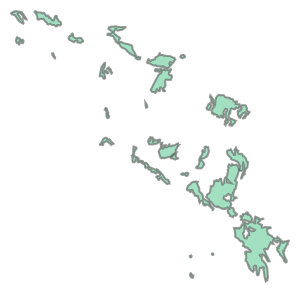

In [2]:
data_.iloc[300]['geometry']

In [3]:
data_.iloc[300].to_dict()

{'STATE': 'CA',
 'ORIG_LABEL': 'Tv',
 'SGMC_LABEL': 'Tv15;0',
 'UNIT_LINK': 'CATv15;0',
 'UNIT_NAME': 'Tertiary volcanic flow rocks, unit 15 (Southern Mojave Desert)',
 'geometry': <MULTIPOLYGON (((-1756806.778 1294260.753, -1756806.121 1294192.507, -175680...>,
 'AGE_MIN': 'Phanerozoic - Cenozoic - Tertiary-Neogene - Late-Miocene - Tortonian',
 'AGE_MAX': 'Phanerozoic - Cenozoic - Tertiary-Paleogene - Late-Oligocene - Chattian',
 'MAJOR1': 'Rhyolite',
 'MAJOR2': 'Basalt',
 'MAJOR3': None,
 'MINOR1': 'Dacite',
 'MINOR2': None,
 'MINOR3': None,
 'MINOR4': None,
 'MINOR5': None,
 'GENERALIZE': 'Igneous, volcanic',
 'UNIT_AGE': None,
 'UNITDESC': None,
 'full_desc': 'tertiary volcanic flow rocks unit 15 southern mojave desert phanerozoic cenozoic tertiary neogene late miocene tortonian phanerozoic cenozoic tertiary paleogene late oligocene chattian rhyolite basalt dacite igneous volcanic'}

In [4]:
""" Vectorization utilties """
import numpy as np
import pandas as pd


def convert_text_to_vector(text, model, method='sum'):
    """ Embed the tokens piece of text with a model.
        Tokens are produced by a simple whitespace split on the text
        if the text is provided as a string.
    
    :param text: text string or list
    :param model: word embedding model - must implement subscription by word
        e.g. mode['word']
    :param method: how to aggregate the individual token vectors
        sum - sum them
        mean - average them
        None - no aggregation, return a matrix of one vector per token
    """
    if type(text) == str:
        text = text.split()
    elif type(text) == list:
        pass
    else:
        raise ValueError('text must be a str or list')
        
    vectors = [model[word] for word in text if word in model]

    if len(vectors) == 0:
        vectors = np.zeros(shape=(model.vector_size,))
        return vectors
    try:
        vectors = np.stack(vectors)
    except Exception as e:
        print(e)
        print(vectors)

    if method == 'sum':
        vectors = np.sum(vectors, axis=0)
    elif method == 'mean':
        vectors = np.mean(vectors, axis=0)
    elif method == None:
        vectors = vectors
    else:
        raise ValueError(f'Unknown method: {method}')

    return vectors


def convert_dfcol_text_to_vector(df, col, model, method):
    """ Convert a text column of a df (col) to a vector, using 
        word embedding model model and vector aggregation method method.

    :param df: input dataframe
    :param col: text column to vectorize
    :param model: embedding model, must be subscriptable by word (e.g. model['word'])
    :param method: vector aggregation method

    :returns: an np.ndarray of shape (n_rows, n_vector_dim)
    """
    X = df[col].apply(lambda x: convert_text_to_vector(x, model, method=method))
    X = np.stack(X.values)
    return X

In [5]:
from sentence_transformers import SentenceTransformer
from tqdm import tqdm
import numpy as np

embed_model = SentenceTransformer('BAAI/bge-base-en-v1.5')

def convert_text_to_vector_hf(data, model, batch_size=64):
    vectors = []
    for i in tqdm(range(0, len(data), batch_size)):
        vectors.append(model.encode(data[i:i+batch_size]))
    vectors = np.concatenate(vectors, axis=0)
    return vectors


/data/meng/anaconda3/envs/geolm/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## load word embeddings

In [6]:
# glove_model_file = '/data/meng/datalake/cmaas-ta2/k8s/meng/mappable_criteria/geoscience_language_models/nrcan_p2/data/06_models/glove/dataset_geoscience_bc_04-19-2024-11-43-25/vectors.txt'
glove_model_file = '/data/meng/datalake/cmaas-ta2/k8s/meng/mappable_criteria/geoscience_language_models/Geoscience_GloVe_Embedding_Minerals.csv'

if glove_model_file.endswith('.csv'):
    glove_embedding = pd.read_csv(glove_model_file)
    glove_dict = glove_embedding['word']
    glove_emb = glove_embedding.drop(columns=['Group', 'Dana', 'Mineral', 'Mineral_Lowercase', 'word']).to_numpy()

    vec_dict = {}
    for i, word in enumerate(glove_dict.to_list()):
        vec_dict[word] = glove_emb[i]
    dim = glove_emb.shape[1]

elif glove_model_file.endswith('.txt'):
    vec_dict = {}
    with open(glove_model_file, 'r') as f:
        for i, line in enumerate(f.readlines()):
            try:
                word_list = line.split(delimiter)
                word = word_list[0]
                vec = np.array([float(e) for e in word_list[1:]])
                vec_dict[word] = vec
            except Exception as e:
                print(f'error found in {i}th line: {str(e)}, skip')
    dim = vec.shape[0]


In [7]:
class W2V_model(object):
    def __init__(self, vec_dict, vector_size):
        self.embeddings = vec_dict
        self.vector_size = vector_size
    
    def __getitem__(self, key):
        return self.embeddings[key]
    
    def __contains__(self, key):
        return key in self.embeddings

glove_model = W2V_model(vec_dict, dim)

In [8]:
print('calcurmolite' in glove_model)
print(glove_model['calcurmolite'].shape)
print(glove_model.vector_size)

True
(300,)
300


# Extract vectors

In [9]:
full_desc = data_['full_desc'].to_list()
full_desc[-5:]

['white river formation phanerozoic cenozoic tertiary paleogene early oligocene rupelian phanerozoic cenozoic tertiary paleogene late eocene priabonian claystone conglomerate sedimentary clastic',
 'white river formation brule member phanerozoic cenozoic tertiary paleogene oligocene phanerozoic cenozoic tertiary paleogene oligocene claystone sandstone conglomerate sedimentary clastic',
 'white river formation chadron member phanerozoic cenozoic tertiary paleogene oligocene phanerozoic cenozoic tertiary paleogene oligocene claystone sandstone conglomerate sedimentary clastic',
 'white river formation upper conglomerate member phanerozoic cenozoic tertiary paleogene oligocene phanerozoic cenozoic tertiary paleogene oligocene conglomerate conglomerate sandstone sedimentary clastic',
 'gallatin limestone gros ventre formation equivalents flathead sandstone cambrian rocks phanerozoic paleozoic cambrian furongian phanerozoic paleozoic cambrian middle cambrian limestone sandstone shale sedime

In [10]:
# polygon_vectors = convert_dfcol_text_to_vector(data_, 'full_desc', glove_model, method='mean')
polygon_vectors = convert_text_to_vector_hf(data_['full_desc'].to_list(), embed_model)

100%|██████████| 60/60 [00:05<00:00, 11.39it/s]


In [11]:
polygon_vectors.shape

(3839, 768)

## Search

In [13]:
system_porphyry_copper = {
    'deposit_type': 'porphyry copper',
    'synonyms': 'Calcalkaline porphyry',
    'commodities': 'Cu, Mo, Au, Ag',
    'description': 'Porphyry copper deposits consist of disseminated copper minerals and copper minerals in veins and breccias that are relatively evenly distributed in large volumes of rock, forming high tonnage (>100 Mt), low to moderate grade (0.3–2.0 wt.% Cu) ores. Host rocks are altered and genetically related granitoid porphyry intrusions and adjacent wall rocks.',
    'rock_types': 'Tonalite to monzogranite or syenitic porphyry intruding granitic, volcanic, calcareous sedimentary, and other rocks.',
    'textures': 'Porphyry has closely spaced phenocrysts and microaplitic quartz-feldspar groundmass.',
    'age_range': 'Mainly Mesozoic and Cenozoic, but may be any age.',
    'depositional_environment': 'High-level intrusive complexes that commonly include stocks, dikes, and breccia pipes. Many deposits are focused in swarms of porphyry dikes that may radiate from larger intrusions or batholiths. The deposits form at shallow (mostly 6 km or less) depth by fluids exsolved from underlying crystallizing magmas emplaced at greater than 3–10-km depth in the upper crust and by external waters heated by those magmas',
    'tectonic_setting': 'Localized in time and space within magmatic arcs along convergent plate margins where subduction of oceanic crust and arc-type magmatism generates hydrous, oxidized upper crustal granitoids genetically related to ores. Arc crust is relatively thick, and there is evidence for broadly coeval compressional or transpressional tectonism',
    'ore_mineralogy': 'Hypogene: Chalcopyrite+pyrite±molybdenite; chalcopyrite+magnetite±bornite± Au; assemblages may be superposed. Quartz+K-feldspar+biotite±anhydrite; quartz+sericite+clay minerals. Late veins of enargite, tetrahedrite, galena, sphalerite, and barite in some deposits. Supergene: brochantite, copper pitch, cuprite, native copper, tenorite, chrysocolla, neotocite, malachite, and atacamite.',
    'alteration': 'Major alteration types are (1) potassic, (2) sericitic, (3) advanced argillic, (4) intermediate argillic, (5) propylitic, (6) sodiccalcic and sodic, (7) greisen, and (8) skarn. Weathering can form an enriched oxide zone above sulfide ore.',
    'ore_controls': 'Stockwork veins in porphyry, along porphyry contact, and in favorable country rocks such as carbonate rocks, mafic igneous rocks, and older granitic plutons.',
    'geochemical_signatures': 'Cu+Mo±Au+Ag+W+B+Sr center, Pb, Zn, Au, As, Sb, Se, Te, Mn, Co, Ba, and Rb outer. Locally Hg and Sn form most distal anomalies. High S in all zones. Some deposits have weak U anomalies.',
    'geophysical_signature': 'Ore zones can be associated with magnetite-rich rocks and are indicated by magnetic surveys. Intensely hydrothermally altered rocks, with quartz-pyrite-sericite (phyllic) alteration produce magnetic and resistivity lows. Pyritic haloes surrounding ore respond well to induced polarization (IP) surveys but in sulfide-poor systems the ore itself provides the only significant IP response. Remote sensing: In areas of good exposure with limited vegetation, airborne and spaceborne multispectral and hyperspectral imaging systems can be used to map alteration mineral associations and their spatial relations in porphyry copper systems. Hydrothermal minerals characteristic of sericitic, intermediate and advanced argillic, and propylitic alteration, iron oxides and hydroxides, and silica can be remotely mapped using their distinctive absorption features in the visible near-infrared through short-wave infrared and thermal-infrared wavelengths',
}

system_tungsten_skarn = {
    'deposit_type': 'tungsten skarn',
    'synonyms': 'Pyrometasomatic or contact metasomatic tungsten deposits.',
    'commodities': 'W, Mo, Cu, Sn, Zn',
    'description': 'Scheelite-dominant mineralization genetically associated with a skarn gangue.',
    'rock_types': 'Pure and impure limestones, calcareous to carbonaceous pelites. Associated with tonalite, granodiorite, quartz monzonite and granite of both I- and S-types. W skarn-related granitoids, compared to Cu skarn- related plutonic rocks, tend to be more differentiated, more contaminated with sedimentary material, and have crystallized at a deeper structural level.',
    'age_range': 'Mainly Mesozoic, but may be any age.',
    'depositional_environment': 'Contacts and roof pendants of batholith and thermal aureoles of apical zones of stocks that intrude carbonate rocks.',
    'tectonic_setting': 'Continental margin, synorogenic plutonism intruding deeply buried sequences of eugeoclinal carbonate-shale sedimentary rocks. Can develop in tectonically thickened packages in back-arc thrust settings.',
    'ore_mineralogy': 'Scheelite ± molybdenite ± chalcopyrite ±pyrrhotite ± sphalerite ± arsenopyrite ± pyrite ± powellite. May contain trace wolframite, fluorite, cassiterite, galena, marcasite and bornite. Reduced types are characterized by pyrrhotite, magnetite, bismuthinite, native bismuth and high pyrrhotite:pyrite ratios. Variable amounts of quartz-vein stockwork (with local molybdenite) can cut both the exoskarn and endoskarn',
    'alteration': 'Exoskarn alteration: Inner zone of diopside-hedenbergite±grossular-andradite±biotite±vesuvianite, with outer barren wollastonite-bearing zone. An innermost zone of massive quartz may be present. Late stage spessartine±almandine±biotite±amphibole±plagioclase±phlogopite±epidote±fluorite±sphene. Exoskarn envelope can be associated with extensive areas of biotite hornfels. Endoskarn alteration: Pyroxene±garnet±biotite±epidote±amphibole±muscovite±plagioclase±pyrite±pyrrhotite±trace tourmaline and scapolite; local greisen developed.',
    'ore_controls': 'Carbonate rocks in extensive thermal aureoles of intrusions; gently inclined bedding and intrusive contacts; structural and (or) stratigraphic traps in sedimentary rocks and irregular parts of the pluton/country rock contacts.',
    'geochemical_signatures': 'W, Cu, Mo, As, Bi, and B. Less commonly Zn, Pb, Sn, Be, and F.',
    'geophysical_signature': 'Magnetic and induced polarization surveys can be used to outline the surface projection of ore bodies because magnetite, pyrrhotite, and other sulfide minerals are common in these deposits. Although skarns typically have a positive density contrast relative to adjacent intrusions and carbonate rocks, gravity surveys are not commonly used due to high cost and nonspecificity for ore. Remote-sensing techniques can effectively identify carbonate terranes and iron enrichment in skarns if skarn is exposed. In some cases, contacts between intrusions and sedimentary rocks can be mapped and carbonate rocks can be distinguished from noncarbonate rocks.'
}



# system_zinc_lead = {
#     'synonyms': 'Shale-hosted Zn-Pb-Ag, sediment-hosted massive sulfide Zn-Pb-Ag, SEDEX Zn-Pb',
#     'commodities': 'Zn, Pb, Ag (minor Cu, barite).',
#     'description': 'Beds and laminations of sphalerite, galena, pyrite, pyrrhotite and rare chalcopyrite, with or without barite, in euxinic clastic marine sedimentary strata. Deposits are typically tabular to lensoidal in shape and range from centimeters to tens of meters thick. Multiple horizons may occur over stratigraphic intervals of 1,000 m or more',
#     'rock_types': 'Carbonaceous black shale, siltstone, cherty argillite and chert. Thin interbeds of turbiditic sandstone, granule to pebble conglomerate, pelagic limestone and dolostone, although volumetrically minor, are common. Evaporites, calcareous siltstone and mudstone are common in shelf settings. Small volumes of volcanic rocks, typically tuff and submarine mafic flows, may be present within the host succession. Slump breccia, fan conglomerates and similar deposits occur near synsedimentary growth faults. Rapid facies and thickness changes are found near the margins of second and third order basins. In some basins high-level mafic sills with minor dikes are important.'
# }

systems_dict = {
    'porphyry_copper': system_porphyry_copper,
    'tungsten_skarn': system_tungsten_skarn,
}

In [28]:
from sklearn.metrics.pairwise import cosine_similarity

system_name = 'tungsten_skarn'
descriptive_model = systems_dict[system_name]

query_vec = {}
cos_sim = {}
for key in descriptive_model:
    query_vec[key] = convert_text_to_vector_hf([descriptive_model[key]],  embed_model)
    cos_sim[key] = cosine_similarity(query_vec[key], polygon_vectors)[0]

100%|██████████| 1/1 [00:00<00:00, 61.76it/s]


In [29]:
ind = np.argsort(cos_sim['rock_types'])[::-1]
print(ind)
cos_sim['rock_types'][ind]

[2316  757 1672 ... 2568 2584  104]


array([0.7353147 , 0.7257795 , 0.72517467, ..., 0.42164493, 0.42164493,
       0.42164493], dtype=float32)

In [30]:
for i in ind[:5]:
    print(data_.iloc[i])

STATE                                                                                OR
ORIG_LABEL                                                                          KJg
SGMC_LABEL                                                                        KJg;0
UNIT_LINK                                                                       ORKJg;0
UNIT_NAME                                                                Granitic rocks
geometry                              MULTIPOLYGON (((-2200181.667199999 2431572.223...
AGE_MIN                               Phanerozoic - Mesozoic - Cretaceous - Early-Cr...
AGE_MAX                               Phanerozoic - Mesozoic - Jurassic - Late-Jurassic
MAJOR1                                                                   Quartz-diorite
MAJOR2                                                                          Diorite
MAJOR3                                                                             None
MINOR1                          

In [31]:
data_.keys()


Index(['STATE', 'ORIG_LABEL', 'SGMC_LABEL', 'UNIT_LINK', 'UNIT_NAME',
       'geometry', 'AGE_MIN', 'AGE_MAX', 'MAJOR1', 'MAJOR2', 'MAJOR3',
       'MINOR1', 'MINOR2', 'MINOR3', 'MINOR4', 'MINOR5', 'GENERALIZE',
       'UNIT_AGE', 'UNITDESC', 'full_desc', 'bge_deposit_type',
       'bge_deposit_type_color', 'bge_synonyms', 'bge_synonyms_color',
       'bge_commodities', 'bge_commodities_color', 'bge_description',
       'bge_description_color', 'bge_rock_types', 'bge_rock_types_color',
       'bge_textures', 'bge_textures_color', 'bge_age_range',
       'bge_age_range_color', 'bge_depositional_environment',
       'bge_depositional_environment_color', 'bge_tectonic_setting',
       'bge_tectonic_setting_color', 'bge_ore_mineralogy',
       'bge_ore_mineralogy_color', 'bge_alteration', 'bge_alteration_color',
       'bge_ore_controls', 'bge_ore_controls_color',
       'bge_geochemical_signatures', 'bge_geochemical_signatures_color',
       'bge_geophysical_signature', 'bge_geophysical_s

In [32]:
def float_to_color(array):
    return ((array-array.min()) * (1/(array.max()-array.min())*255)).astype('uint8')

bge_all = 0
for key in cos_sim:
    tmp = cos_sim[key]
    tmp_color = float_to_color(tmp)
    bge_all += tmp
    data_['bge_'+key] = pd.Series(list(tmp))
    data_['bge_'+key+'_color'] = pd.Series(list(tmp_color))

bge_all /= len(cos_sim)
bge_all_color = float_to_color(bge_all)
data_['bge_all'] = pd.Series(list(bge_all))
data_['bge_all_color'] = pd.Series(list(bge_all_color))

In [37]:
data_

,STATE,ORIG_LABEL,SGMC_LABEL,UNIT_LINK,UNIT_NAME,geometry,AGE_MIN,AGE_MAX,MAJOR1,MAJOR2,...,bge_alteration,bge_alteration_color,bge_ore_controls,bge_ore_controls_color,bge_geochemical_signatures,bge_geochemical_signatures_color,bge_geophysical_signature,bge_geophysical_signature_color,bge_all,bge_all_color
0,AL,Cb,CAb;6,ALCAb;6,Bibb Dolomite,"MULTIPOLYGON (((832781.765 1141916.902, 832757...",Phanerozoic - Paleozoic - Cambrian,Phanerozoic - Paleozoic - Cambrian,Dolostone,None,...,0.623846,178,0.659115,227,0.497666,127,0.590522,151,0.599221,196
1,AL,Cbf,CAbf;6,ALCAbf;6,Brierfield Dolomite,"MULTIPOLYGON (((828105.461 1140035.734, 828194...",Phanerozoic - Paleozoic - Cambrian,Phanerozoic - Paleozoic - Cambrian,Dolostone,None,...,0.600909,160,0.656630,225,0.493432,121,0.594571,155,0.592855,188
2,AL,Cc,CAc;3,ALCAc;3,Conasauga Formation,"MULTIPOLYGON (((834307.853 1195534.911, 834340...",Phanerozoic - Paleozoic - Cambrian,Phanerozoic - Paleozoic - Cambrian,Limestone,Shale,...,0.610043,167,0.564924,142,0.488498,114,0.548365,112,0.571967,162
3,AL,Cc,CAc;5,ALCAc;5,Conasauga Formation,"MULTIPOLYGON (((815080.156 1159156.222, 815251...",Phanerozoic - Paleozoic - Cambrian,Phanerozoic - Paleozoic - Cambrian,Limestone,Shale,...,0.610043,167,0.564924,142,0.488498,114,0.548365,112,0.571967,162
4,AL,Cc,CAc;6,ALCAc;6,Conasauga Formation,"MULTIPOLYGON (((823372.143 1137719.412, 824201...",Phanerozoic - Paleozoic - Cambrian,Phanerozoic - Paleozoic - Cambrian,Dolostone,Limestone,...,0.601322,160,0.609348,182,0.451230,61,0.539690,104,0.564133,152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3834,WY,Twr,Twr;0,WYTwr;0,White River Formation,"MULTIPOLYGON (((-993663.580 2200640.192, -9938...",Phanerozoic - Cenozoic - Tertiary-Paleogene - ...,Phanerozoic - Cenozoic - Tertiary-Paleogene - ...,Claystone,Conglomerate,...,0.629676,183,0.608565,181,0.530541,173,0.607968,168,0.611452,211
3835,WY,Twrb,Twrb;0,WYTwrb;0,White River Formation - Brule Member,"MULTIPOLYGON (((-697050.421 2101995.945, -6966...",Phanerozoic - Cenozoic - Tertiary-Paleogene - ...,Phanerozoic - Cenozoic - Tertiary-Paleogene - ...,Claystone,Sandstone,...,0.620376,175,0.618912,191,0.508445,142,0.579721,141,0.600197,197
3836,WY,Twrc,Twrc;0,WYTwrc;0,White River Formation - Chadron Member,"MULTIPOLYGON (((-682031.904 2107680.765, -6824...",Phanerozoic - Cenozoic - Tertiary-Paleogene - ...,Phanerozoic - Cenozoic - Tertiary-Paleogene - ...,Claystone,Sandstone,...,0.604407,163,0.594007,168,0.506579,139,0.577921,140,0.590842,185
3837,WY,Twru,Twru;0,WYTwru;0,White River Formation - Upper conglomerate member,"MULTIPOLYGON (((-872254.496 2197545.942, -8723...",Phanerozoic - Cenozoic - Tertiary-Paleogene - ...,Phanerozoic - Cenozoic - Tertiary-Paleogene - ...,Conglomerate,Conglomerate-sandstone,...,0.631444,184,0.614043,186,0.529864,172,0.598353,159,0.612852,213


In [36]:
# data__.to_file('polygons_porphyry_copper.json', driver="GeoJSON")
# data_.to_file('polygons_porphyry_copper', driver='ESRI Shapefile')

gpkg_fname = f'/home/meng/Downloads/polygons_{system_name}.gpkg'
data_.to_file(gpkg_fname, driver="GPKG")
# for geomtype in data_.geom_type.unique():
#     data_[data_.geom_type == geomtype].to_file(gpkg_fname, driver="GPKG", layer=geomtype)

In [27]:
# import shutil
# shutil.make_archive('polygons_porphyry_copper', 'zip', 'polygons_porphyry_copper')